<a href="https://colab.research.google.com/github/65310106/Project-_1/blob/main/Project_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt

# **Outlier**


In [2]:
train_data = pd.read_csv('Project.csv')
train_data.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


จำนวนแถวและคอลัมน์ของ Data set 


In [3]:
train_data = pd.read_csv('Project.csv')
train_data.shape

(1000, 17)

ตรวจสอบข้อมูล info() function

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

เช็คค่าสถิติ describe() function

In [5]:
train_data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


สร้าง boxplot เพื่อหา outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x7f001443feb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f00143d55b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f001443fb50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f00143d5c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f00143d5f70>],
 'means': []}

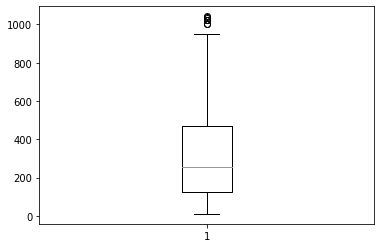

In [6]:
x = np.array(train_data['Total'])
plt.boxplot(x)

calculate IQR, upper bound and lower bound

In [7]:
Q3 = np.percentile(train_data['Total'],75)
Q1 = np.percentile(train_data['Total'],25)
IQR = Q3 - Q1
Upper_bound = Q3 + 1.5 * IQR
Lower_bound = Q1 - 1.5 * IQR
print('IQR = ',IQR)
print('Upper_bound = ',Upper_bound)
print('Lower_bound = ',Lower_bound)

IQR =  346.927875
Upper_bound =  991.7420625
Lower_bound =  -395.9694375


 filter data without outlier and kept in data2 >> more than upper bound or lower than lower bound

In [8]:
data2 = train_data[(train_data['Total'] <= Upper_bound) & (
train_data['Total'] >= Lower_bound )]
print(data2)

      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
994  652-49-6720      C  Naypyitaw        Member  Female   
995  233-67-5758      C  Naypyitaw        Normal    Male   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%     Total  \
0         Health and beauty       74.69         7  26.1415  548.9715   
1    Electronic accessories       15.28         5   3.8200   80.2200   
2        Home and lifestyle       46.33         7  16.2155  340

plot box plot of data2 to check outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x7f001415d8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f001415df70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f001415d550>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0014169670>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0014169970>],
 'means': []}

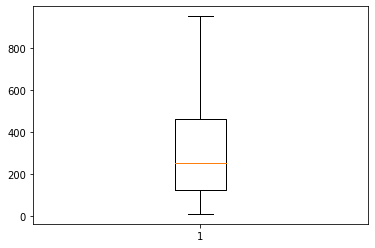

In [9]:
x = np.array(data2['Total'])
plt.boxplot(x)

# Missing value

In [11]:
data3 = pd.read_csv('Project.csv')
print(data3)

      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155  

In [12]:
data4 = data3.dropna(axis=0)
print(data4)

      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155  